# Phase 11: Role-Relative Impact, Market Inefficiency, and Live Validation

This phase translates the impact model into interpretable insights, 
highlighting undervalued player profiles from the 2024/25 Bundesliga season 
and observing their progression in the 2025/26 season under real-world data constraints.

## 11.1 Data Sources and Scope

All impact modeling and market efficiency analysis is anchored on the full 2024/25 Bundesliga season.
Live-season (2025/26) data is used strictly for observational validation due to partial public availability.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_2425 = pd.read_csv("../data/processed/players_2425_with_values.csv")
df_live = pd.read_csv("../data/processed/live_watchlist_2526.csv")

print(df_2425.shape, df_live.shape)

(308, 33) (60, 26)


## 11.2 Impact Distribution by Role (2024/25)

Impact is evaluated within positional roles to avoid cross-role distortion.
The distributions below demonstrate why role awareness is non-negotiable.

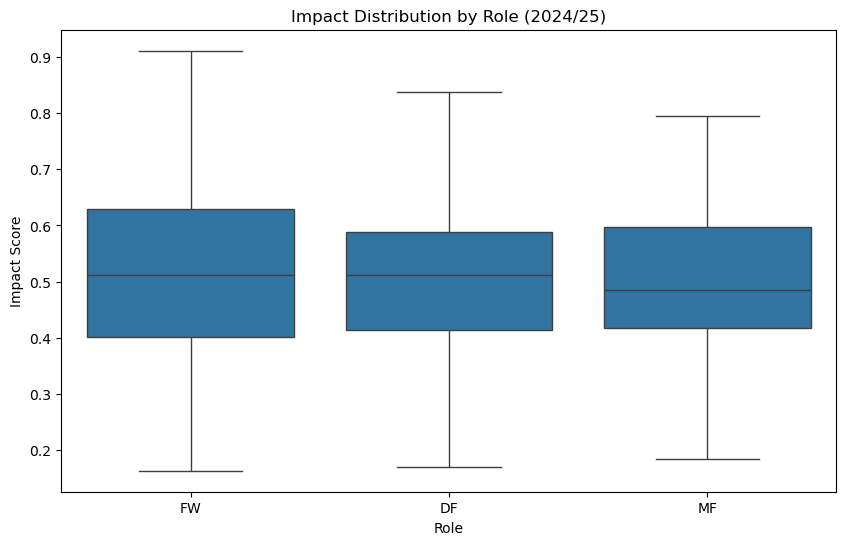

In [3]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_2425, x="role", y="impact_raw", showfliers=False)
plt.title("Impact Distribution by Role (2024/25)")
plt.xlabel("Role")
plt.ylabel("Impact Score")
plt.show()

## 11.3 Metric Contributions to Impact

Impact is multi-dimensional. 
This section illustrates how different metrics contribute across roles.

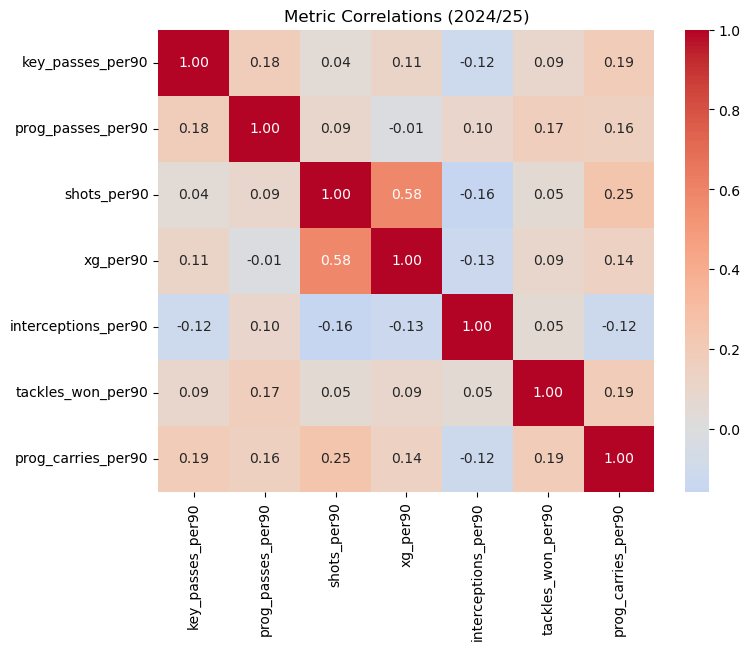

In [4]:
metrics = [
    "key_passes_per90",
    "prog_passes_per90",
    "shots_per90",
    "xg_per90",
    "interceptions_per90",
    "tackles_won_per90",
    "prog_carries_per90"
]

corr = df_2425[metrics].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Metric Correlations (2024/25)")
plt.show()

## 11.4 Market Inefficiency: Impact vs Market Value (2024/25)

Market value is compared against role-relative impact 
to identify undervalued contributors.

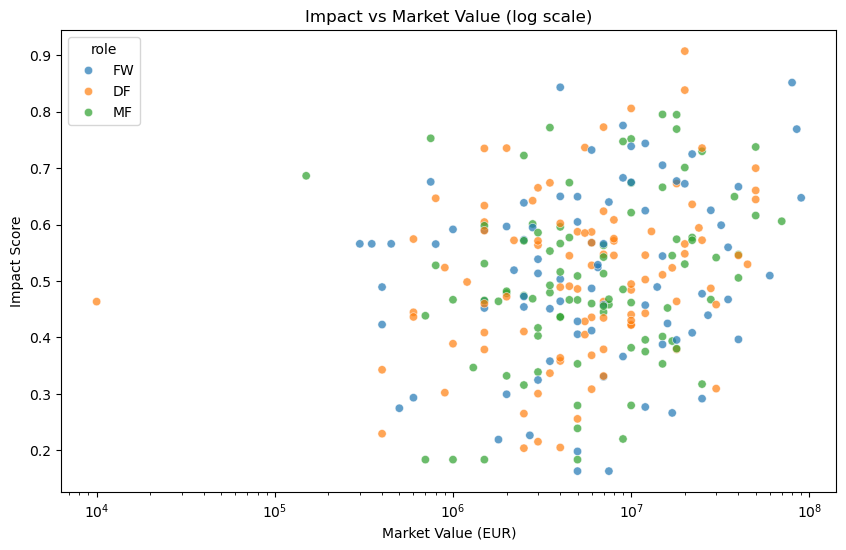

In [6]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_2425,
    x="market_value_eur",
    y="impact_raw",
    hue="role",
    alpha=0.7
)
plt.xscale("log")
plt.title("Impact vs Market Value (log scale)")
plt.xlabel("Market Value (EUR)")
plt.ylabel("Impact Score")
plt.show()

## 11.5 Undervalued Player Shortlist (2024/25)

The following players delivered high role-relative impact 
at comparatively low market valuations.

In [7]:
shortlist = (
    df_2425
    .sort_values("value_eff", ascending=False)
    .groupby("role")
    .head(5)
)

shortlist[[
    "player",
    "role",
    "club",
    "impact_raw",
    "market_value_eur",
    "value_eff"
]]

,player,role,club,impact_raw,market_value_eur,value_eff
50,Chema,MF,Stuttgart,0.686495,150000.0,0.057600
174,Johan Manzambi,MF,Freiburg,0.752990,750000.0,0.055662
255,Armindo Sieb,FW,Mainz 05,0.843427,4000000.0,0.055482
233,Julian Ryerson,DF,Dortmund,0.907524,20000000.0,0.053983
299,Silvan Widmer,DF,Mainz 05,0.735024,1500000.0,0.051686
195,Florian Neuhaus,MF,Gladbach,0.771946,3500000.0,0.051230
154,Lukas Kübler,DF,Freiburg,0.735560,2000000.0,0.050698
14,Arthur,DF,Leverkusen,0.463452,10000.0,0.050318
153,Rasmus Kristensen,DF,Eint Frankfurt,0.805929,10000000.0,0.050001
258,Danel Sinani,FW,St. Pauli,0.675753,750000.0,0.049953


## 11.6 Live-Season Validation (2025/26)

Due to changes in public data availability, 
live-season analysis is observational rather than model-driven.

The following players from the 2024/25 shortlist 
continue to show meaningful involvement in the 2025/26 season.

In [8]:
df_live[["player", "role", "impact_adj"]].head(10)

,player,role,impact_adj
0,Ridle Baku,DF,0.153691
1,Rasmus Kristensen,DF,0.153126
2,Maximilian Mittelstädt,DF,0.151844
3,David Raum,DF,0.147121
4,Bernardo,DF,0.143225
5,Lukas Kübler,DF,0.142208
6,Dominik Kohr,DF,0.134063
7,Castello Lukeba,DF,0.132112
8,Dayot Upamecano,DF,0.128914
9,Jarell Quansah,DF,0.127176


While the impact model and value efficiency analysis are anchored on the full 2024/25 season, a limited set of players from the undervalued shortlist were manually tracked during the 2025/26 season to observe whether their impact profiles persist in live competition.
This validation is observational, not model-driven, due to constraints in publicly available advanced statistics.

### Julian Ryerson (DF)
Ryerson has made 18 appearances this season and continues to demonstrate high involvement across defensive and transitional phases. He has recorded 24 active pressures, 71 ball recoveries, and 9 possessions won in the final third, underscoring his effectiveness as an aggressive, front-foot defender.

Despite his defensive role, Ryerson ranks in the top 10th percentile among defenders for chances created and successful crosses (25 each). He has also registered 6 assists, significantly overperforming his expected assists (xA = 3.63).

Market value progression: €7.5m → €30m

This trajectory strongly aligns with the model’s identification of undervalued, multi-phase contributors at fullback.

### Florian Neuhaus (MF)
Neuhaus has earned 15 appearances (11 starts) and, while not a constant presence across all phases of play, delivers concentrated impact in defensive and positional contexts. He ranks within the top 10th percentile among midfielders for interceptions, blocked shots, and clearances, indicating strong defensive efficiency in limited minutes.

His profile closely mirrors that of Konrad Laimer in terms of isolated defensive impact, albeit in a more constrained role.

Market value: Stable at €3.5m

Neuhaus exemplifies a role-specific contributor whose impact may be undervalued due to limited offensive output.

### Rocco Reitz (MF)
Reitz has featured regularly with 20 appearances and starts, maintaining high activity levels across both offensive and defensive actions. Offensively, he sits around the 80th percentile among midfielders for chances created, successful crosses, touches, and touches in the opposition box.

Defensively, his output is elite:

- 45 tackles

- 35 interceptions

- 97 recoveries

- 31 clearances

All of which place him within the top 5th percentile for his role.

Market value progression: €15m → €17m

Reitz represents a sustained, well-rounded midfield profile with defensive dominance that aligns tightly with the model’s impact signals.

### Danel Sinani (FW/MF)
Sinani emerges as a prototypical “glue” player. Across 17 appearances (11 starts), his raw scoring numbers may appear modest, yet his consistent involvement in dangerous play is evident.

He ranks around the 80th percentile for:

- xG (3.18)

- xA (2.70)

- chances created (24)

- touches (788)

- possessions won in the final third (9)

These indicators highlight sustained influence on attacking sequences beyond traditional goal contributions.

Market value progression: €7.5m → €3m

The divergence between impact indicators and market valuation reinforces his classification as an undervalued contributor.

### Michael Olise (FW)
Olise requires little introduction. While his talent is well recognized, the magnitude of his current output positions him among the most undervalued players relative to role-adjusted impact at the time of analysis.

He is delivering elite-level performance across all four phases of play — shooting, passing, possession, and defending — consistently ranking within the top 5th percentile across multiple metrics. Where he does not lead outright, he remains firmly among the league’s top contributors.

As the season progresses, Olise is producing at a world-class level, validating both the model’s signal and the market’s reassessment.

Market value progression: €80m → €130m

### Summary
Across these cases, the persistence of role-relative impact from the 2024/25 season into the live 2025/26 campaign provides qualitative validation of the model’s core premise: impact is multi-dimensional, role-dependent, and often underrepresented by market valuation alone.

### Interpretation Notes

Impact and value efficiency scores are intended for **relative comparison within positional roles**, not absolute player ranking. 
High value efficiency highlights potential market inefficiencies rather than definitive talent superiority, while low value efficiency often reflects reputation premiums or positional scarcity. 
Live-season observations are included strictly as qualitative validation and do not alter the underlying model.